<a href="https://colab.research.google.com/github/janhavi97/Global-EV-Dataset-Analysis/blob/main/Global_EV_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset
ev_data = pd.read_csv('Global EV Data.csv')

In [5]:
# Define a function to format the tick labels
def millions_formatter(x, pos): return f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K' if x >= 1e3 else f'{int(x)}'

# Trends Over Time - How EV sales and stocks have changed over the years globally

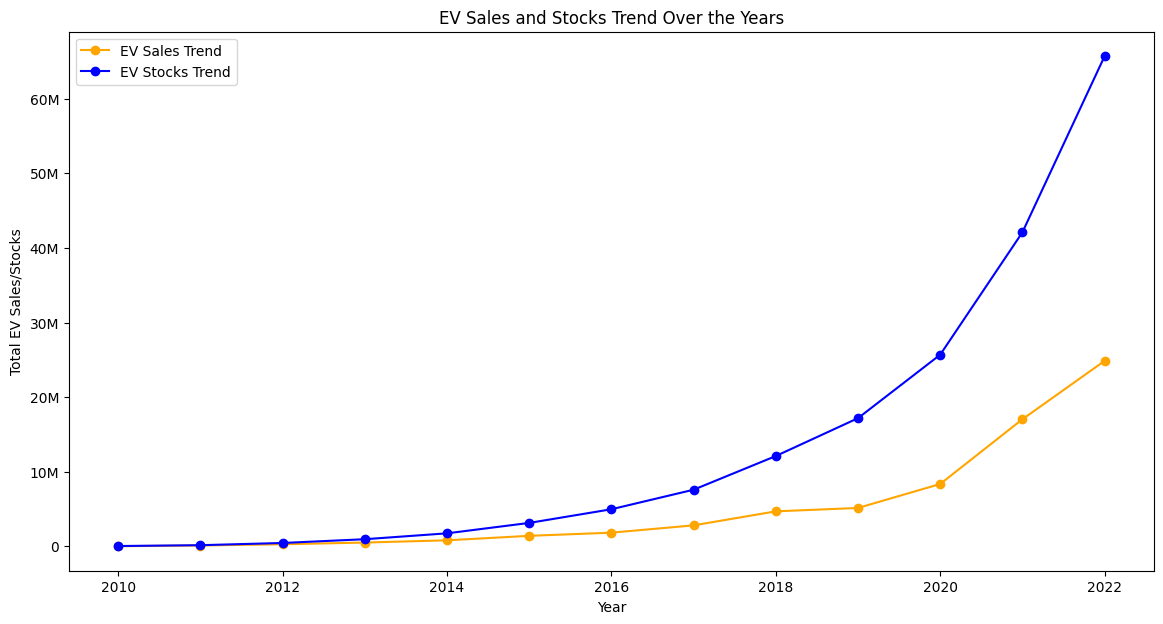

In [18]:
# EV Sales Trend
ev_sales = ev_data[ev_data['parameter'] == 'EV sales'].groupby('year')['value'].sum()

# EV Stocks Trend
ev_stocks = ev_data[ev_data['parameter'] == 'EV stock'].groupby('year')['value'].sum()

# Plot EV Trend
plt.figure(figsize=(14, 7))
ax = ev_sales.plot(kind='line', marker='o', color='orange', label='EV Sales Trend')
ev_stocks.plot(kind='line', marker='o', color='blue', label='EV Stocks Trend', ax=ax)
plt.title('EV Sales and Stocks Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total EV Sales/Stocks')

# Set y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.legend()
plt.show()

###Both EV sales and stocks have shown an upward trend globally over the years, indicating increasing adoption and market penetration of EVs. The increasing trend suggests a growing consumer preference for EVs.


# Powertrain Comparison: Trends in different powertrain types
Plug-in hybrid electric vehicles (PHEVs) and Battery electric vehicles (BEVs)

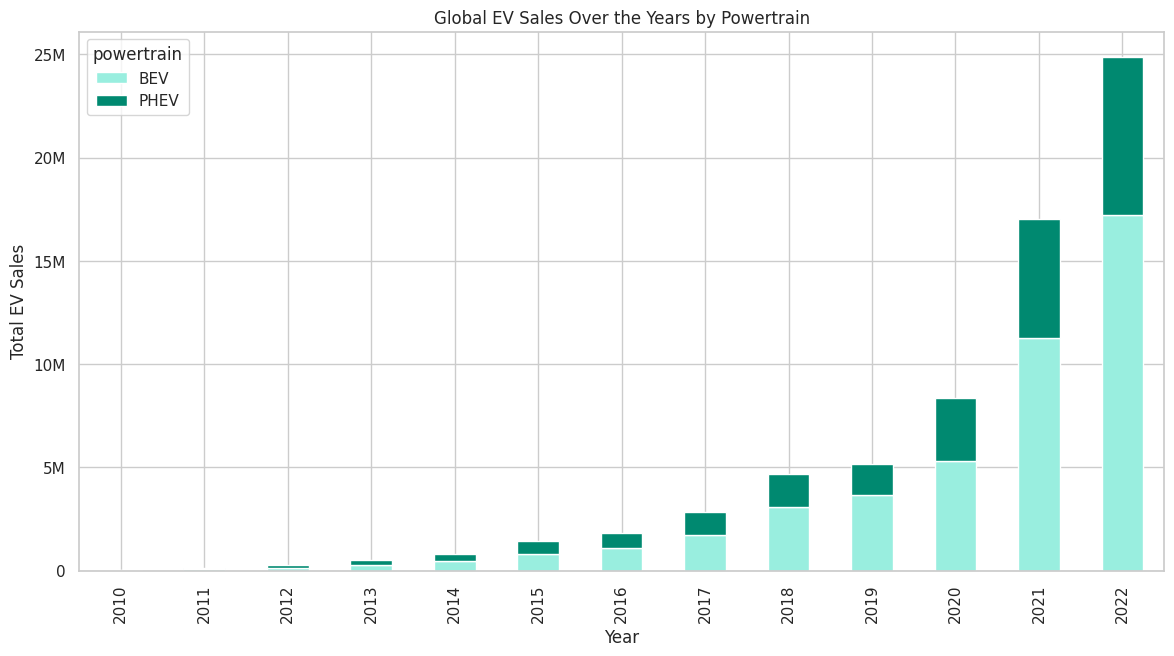

In [171]:
# Filter it based on Powertrain and 'EV sales' parameter
ev_sales_data = ev_data[(ev_data['parameter'] == 'EV sales') & (ev_data['powertrain'].isin(['BEV', 'PHEV']))]

# Group the data by 'year' and 'powertrain' and sum the 'value.'
ev_sales = ev_sales_data.groupby(['year', 'powertrain'])['value'].sum().unstack()

# Set color
colors = ['#99eedf', '#008970']

# Plot the stacked bar chart
ax = ev_sales.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.title('Global EV Sales Over the Years by Powertrain')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')

# Set y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

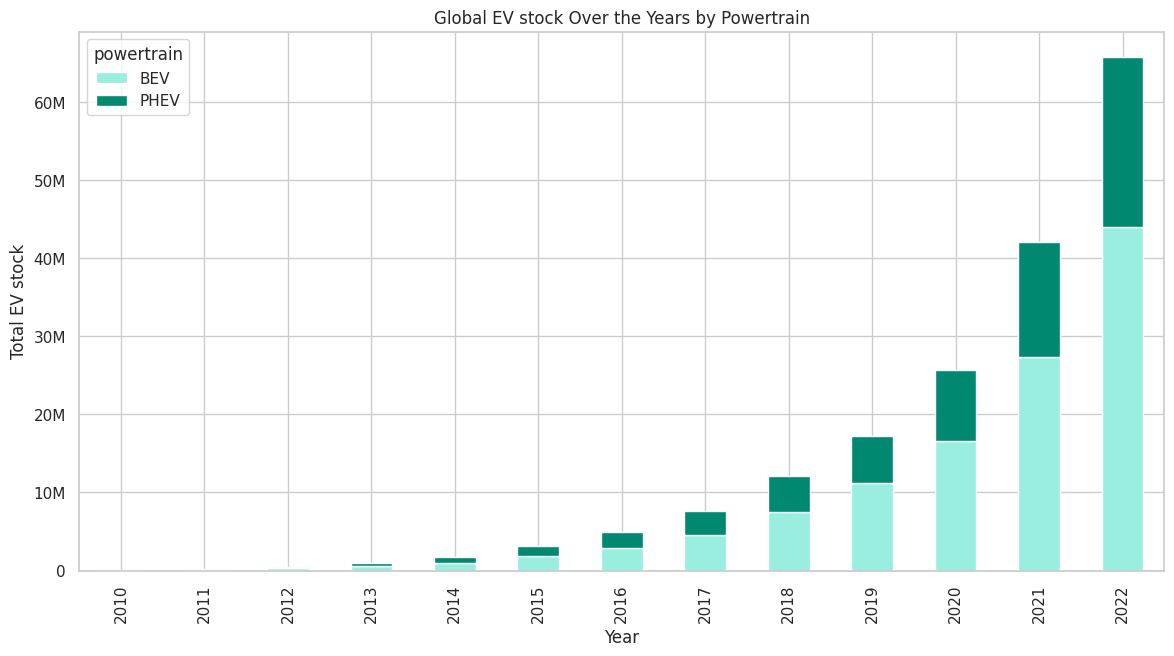

In [173]:
# Filter it based on Powertrain and 'EV Stocks' parameter
ev_stock_data = ev_data[(ev_data['parameter'] == 'EV stock') & (ev_data['powertrain'].isin(['BEV', 'PHEV']))]

# Group the data by 'year' and 'powertrain' and sum the 'value.'
ev_stock = ev_stock_data.groupby(['year', 'powertrain'])['value'].sum().unstack()

# Set color
colors = ['#99eedf', '#008970']

# Plot the stacked bar chart
ax = ev_stock.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.title('Global EV stock Over the Years by Powertrain')
plt.xlabel('Year')
plt.ylabel('Total EV stock')

# Set y-axis formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

###The analysis compares sales and stocks of different EV powertrains, namely Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs). A stacked bar chart depicting sales and stocks by powertrain type over time indicats that BEVs is gaining a larger share of the market compared to PHEVs.

# Regional Analysis: Differences in EV adoption among different regions

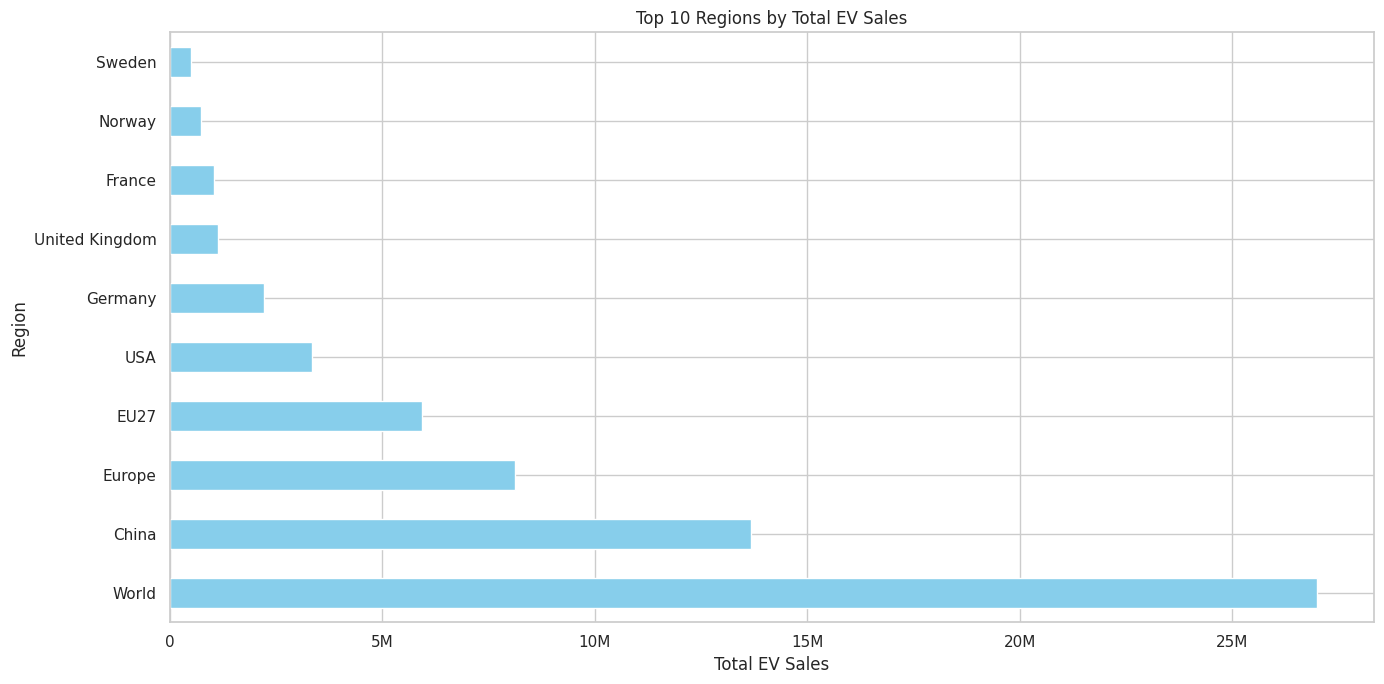

In [179]:
# Filter the data for the 'EV sales' parameter
ev_stock_data = ev_data[ev_data['parameter'] == 'EV sales']

# Group by 'region' and sum the 'value' to get the total EV sales, then get the top 10 regions
ev_stock = ev_stock_data.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

# Plot top 10 regions by total EV Sales
ax = ev_stock.plot(kind='barh', figsize=(14, 7), color='skyblue')
plt.title('Top 10 Regions by Total EV Sales')
plt.ylabel('Region')
plt.xlabel('Total EV Sales')

# Set y-axis formatter
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

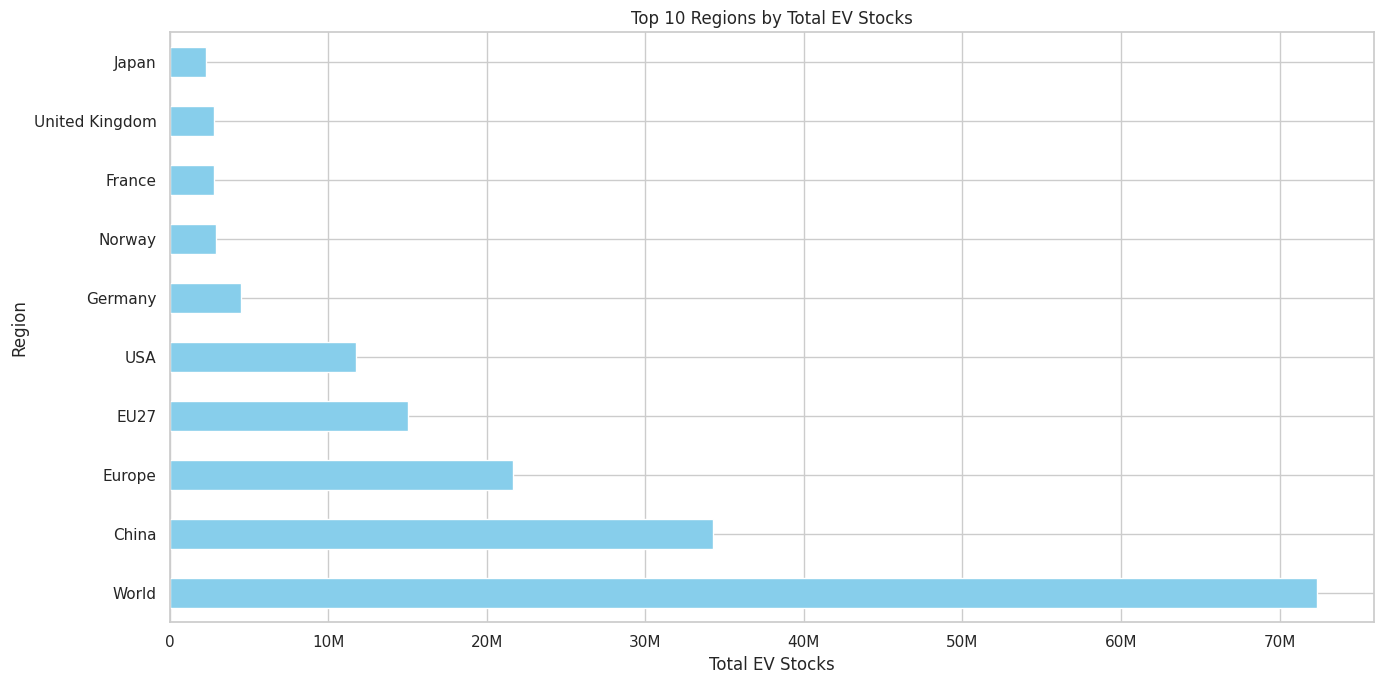

In [181]:
# Regional Analysis: Differences in EV adoption among different regions
# Filter the data for the 'EV stock' parameter
ev_stock_data = ev_data[ev_data['parameter'] == 'EV stock']

# Group by 'region' and sum the 'value' to get the total EV sales, then get the top 10 regions
ev_stock = ev_stock_data.groupby('region')['value'].sum().sort_values(ascending=False).head(10)

# Plot top 10 regions by total EV Stocks
ax = ev_stock.plot(kind='barh', figsize=(14, 7), color='skyblue')
plt.title('Top 10 Regions by Total EV Stocks')  # Updated to reflect the correct number of regions
plt.ylabel('Region')
plt.xlabel('Total EV Stocks')

# Set y-axis formatter
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

###The analysis of EV sales and stocks by region, particularly focusing on the top 10 regions highlights geographical disparities in EV adoption. Regions like China, Europe and USA have higher sales and stocks compare to other countries.